<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/udacity/model_celcius_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to TensorFlow for Deep Learning - Udacity

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging

In [7]:
 print(tf.__version__)

2.4.0


In [9]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [10]:
def celcius_fahrenheit(c):
  return (c * 1.8) + 32;

In [19]:
celcius_fahrenheit(100)

212.0

In [20]:
celcius_in      = np.array([-40, -10, 0, 8, 15, 22, 38, 45, 100], dtype=float)
fahrenheit_out  = np.array([-40, 14, 32, 46, 59, 71, 100, 113, 212], dtype=float)

In [21]:
for i, c in enumerate(celcius_in):
  print("{} degrees Celcius = {} degrees Fahrenheit".format(c, fahrenheit_out[i]))

-40.0 degrees Celcius = -40.0 degrees Fahrenheit
-10.0 degrees Celcius = 14.0 degrees Fahrenheit
0.0 degrees Celcius = 32.0 degrees Fahrenheit
8.0 degrees Celcius = 46.0 degrees Fahrenheit
15.0 degrees Celcius = 59.0 degrees Fahrenheit
22.0 degrees Celcius = 71.0 degrees Fahrenheit
38.0 degrees Celcius = 100.0 degrees Fahrenheit
45.0 degrees Celcius = 113.0 degrees Fahrenheit
100.0 degrees Celcius = 212.0 degrees Fahrenheit


## Create a Model

In [54]:
layer_in = tf.keras.layers.Dense(units = 1, input_shape=[1])

In [55]:
model = tf.keras.Sequential([layer_in])

Alternative

In [42]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 1, input_shape=[1])
])

In [56]:
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(celcius_in, fahrenheit_out, epochs=500, verbose=False)
print('Finished training the model')

Finished training the model


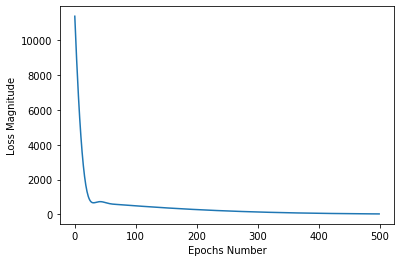

In [59]:
plt.xlabel('Epochs Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [60]:
print(model.predict([100.0]))

[[212.52747]]


In [61]:
print('These are the layer variables: {}'.format(layer_in.get_weights()))

These are the layer variables: [array([[1.860248]], dtype=float32), array([26.50267], dtype=float32)]


## More Layers

In [68]:
l0 = tf.keras.layers.Dense(units = 4, input_shape=[1])
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(celcius_in, fahrenheit_out, epochs=500, verbose=False)
print('Finished training model')
print(model.predict([100.0]))
print('Model predict that 100 degrees Celcius is: {} degrees Fahrenheit'.format(model.predict([100.0])))
print('These are the 10 variables: {}'.format(l0.get_weights()))
print('These are the 11 variables: {}'.format(l1.get_weights()))
print('These are the 12 variables: {}'.format(l2.get_weights()))

Finished training model
[[211.8192]]
Model predict that 100 degrees Celcius is: [[211.8192]] degrees Fahrenheit
These are the 10 variables: [array([[-0.03157808,  0.4086774 ,  0.00721515, -0.56507653]],
      dtype=float32), array([ 2.5096052,  3.598884 , -2.8193026, -3.830949 ], dtype=float32)]
These are the 11 variables: [array([[-1.0576617 ,  0.6924489 , -0.13180615, -1.1219671 ],
       [-0.49414256,  1.239925  , -0.11825409,  0.38744456],
       [ 0.60017014, -0.17513463, -0.6572519 ,  0.21957397],
       [ 0.32170177, -1.059682  , -0.778927  ,  0.3943389 ]],
      dtype=float32), array([-3.8196158,  3.5172484,  2.1036553,  3.2968512], dtype=float32)]
These are the 12 variables: [array([[-0.69419163],
       [ 1.3251745 ],
       [ 0.34528217],
       [ 0.36271155]], dtype=float32), array([3.137537], dtype=float32)]


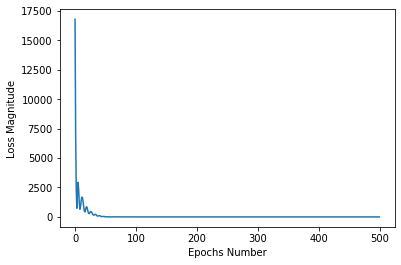

In [70]:
plt.xlabel('Epochs Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [72]:
print(model.predict([1000.0]))

[[1831.5358]]
